**Question 1:** Performing PCA manually. 

1. Simulate two (linearly) correlated random variables $y = aX+b + \epsilon$, where $x \in [-10, 10]$, $a = 1.3; b = 2.1$ and $\epsilon$ is Gaussian noise (mean 0, variance 0.3). Simulate 100 data points. Plot the data.
2. Create a Dara matrix with two columns $x$ and $y$. Center the data and estimate the covariance matrix with a matrix multiplication.
3. Diagonalize the covariance matrix using the Eigen vectors. You can use built in function for Eigen value calculation.
4. Project the data on the PCA coordinates and plot the results. Comment on your observation.
5. What is the variance explained by each PC? Identify signal and noise directions.
6. Denoise the data: Project the data onto PC1 and create a rotate back the projected data onto the original coordinates (features). Plot the results and comment on your findings.


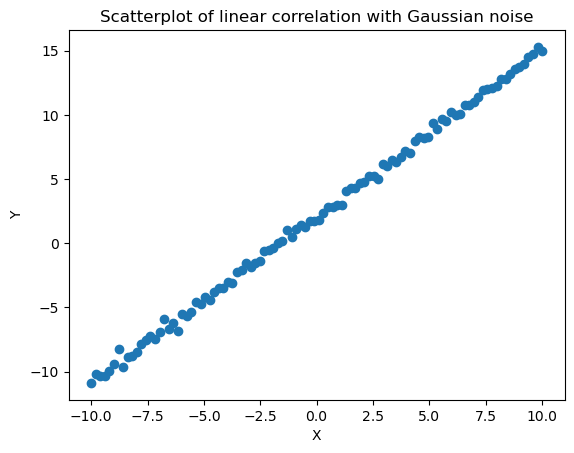

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Simulate two (linearly) correlated random variables (y = aX + B + error), where x is in range [-10, 10]
#error is Gaussian noise (mean 0, variance 0.3)

N = 100 #num data
a = 1.3 #slope
b = 2.1 #intercept

x_range = 10
step = 2 * x_range / (N - 1)

x = np.arange(-x_range, x_range + step, step)

normal_error = np.random.normal(0, 0.3, N )

y = a * x + b + normal_error

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of linear correlation with Gaussian noise')
plt.show()


In [2]:
#Create a Data matrix with two columns $x$ and $y$. Center the data and estimate the covariance matrix with a matrix multiplication.

print('np.mean: \n', np.mean(x), np.mean(y))

#This converts the two correlated np.arrays to a df matrix
data_matrix = pd.DataFrame({'Y': y, 'X': x})

#This centers the data by subtracting the mean of each variable from the corresponding entries in the data
y_centered = y - np.mean(y)
x_centered = x - np.mean(x)
print('y_centered: \n', y_centered, 'x_centered: \n', x_centered)

data_matrix_centered = pd.DataFrame({'y - mu_Y': y_centered, 'x - mu_X': x_centered})
print('data_matrix: \n', data_matrix)
print('data_matrix_centered: \n', data_matrix_centered)

#This estimates the covariance matrix for m (# rows, # observations) and n (#columns, #variables)
m, n = data_matrix.shape
print('m: ', m, ', n: ', n)
covariance_matrix = 1 / (m - 1) * np.dot(data_matrix_centered.T, data_matrix_centered)

print('covariance matrix: \n', covariance_matrix)
print('covariance_matrix.shape: ', covariance_matrix.shape)


np.mean: 
 2.042810365310288e-14 2.094873433875949
y_centered: 
 [-12.96769955 -12.28944047 -12.42667894 -12.43882889 -12.00788603
 -11.47715799 -10.32372974 -11.71636717 -10.91746775 -10.83845938
 -10.53592322  -9.95432206  -9.61150355  -9.29258598  -9.56257995
  -9.0075764   -7.95530627  -8.77797077  -8.27867369  -8.91232528
  -7.60022557  -7.73997627  -7.41958155  -6.63662317  -6.83998974
  -6.24296356  -6.47345123  -5.8874447   -5.6042347   -5.58218939
  -5.11285776  -5.19610573  -4.35657002  -4.17778094  -3.64197616
  -3.9621354   -3.65931348  -3.47491267  -2.66611734  -2.63287658
  -2.48770433  -2.09246079  -1.90776263  -1.02480068  -1.61751589
  -0.9526029   -0.64524995  -0.85520642  -0.35496617  -0.34135652
  -0.26806146   0.27445294   0.71246857   0.70325239   0.89223816
   0.90150469   1.93917634   2.18188066   2.17059374   2.57541865
   2.66639381   3.16720424   3.10902024   2.89691591   4.07080255
   3.89721298   4.3763777    4.19545635   4.62107233   5.10728322
   4.945240

In [3]:
#This diagnolizes the covariance matrix using eigen decomposition.
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('eigenvalues: \n', eigenvalues, '\n eigenvectors: \n', eigenvectors)

covariance_matrix_diagonalized = np.diag(eigenvalues)
print('covariance_matrix_diagonalized: \n', covariance_matrix_diagonalized)

# Sorting the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Printing the sorted eigenvalues and eigenvectors
print('Sorted eigenvalues: \n', sorted_eigenvalues)
print('Sorted eigenvectors: \n', sorted_eigenvectors, '\n')


eigenvalues: 
 [9.22011115e+01 3.24522307e-02] 
 eigenvectors: 
 [[ 0.79225198 -0.61019407]
 [ 0.61019407  0.79225198]]
covariance_matrix_diagonalized: 
 [[9.22011115e+01 0.00000000e+00]
 [0.00000000e+00 3.24522307e-02]]
Sorted eigenvalues: 
 [9.22011115e+01 3.24522307e-02]
Sorted eigenvectors: 
 [[ 0.79225198 -0.61019407]
 [ 0.61019407  0.79225198]] 



projected_data_matrix: 
 [[-1.63756263e+01 -9.70637761e-03]
 [-1.57150027e+01 -2.63525144e-01]
 [-1.57004586e+01 -1.97321388e-02]
 [-1.55868129e+01  1.47732592e-01]
 [-1.51221260e+01  4.48247206e-02]
 [-1.45783842e+01 -1.18971478e-01]
 [-1.35413068e+01 -6.62735657e-01]
 [-1.45213551e+01  3.47094349e-01]
 [-1.37651539e+01  1.96615658e-02]
 [-1.35792878e+01  1.31502031e-01]
 [-1.32163314e+01  1.06947162e-01]
 [-1.26322852e+01 -8.78915093e-02]
 [-1.22374150e+01 -1.37026432e-01]
 [-1.18614804e+01 -1.71577134e-01]
 [-1.19521122e+01  1.53222489e-01]
 [-1.13891380e+01 -2.53864849e-02]
 [-1.04322034e+01 -5.07424572e-01]
 [-1.09606894e+01  1.54611329e-01]
 [-1.04418488e+01  9.99411980e-03]
 [-1.08205890e+01  5.56695465e-01]
 [-9.65780386e+00 -8.38890951e-02]
 [-9.64525010e+00  1.61436862e-01]
 [-9.26814522e+00  1.25984808e-01]
 [-8.52457336e+00 -1.91720851e-01]
 [-8.56241940e+00  9.24231275e-02]
 [-7.96615270e+00 -1.11827806e-01]
 [-8.02548548e+00  1.88865309e-01]
 [-7.43794912e+00 -8.66149820e

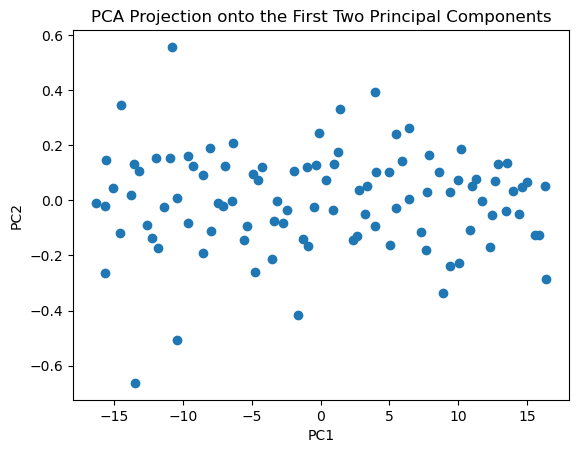

In [4]:
# Projecting the data onto the new subspace (using only the top k eigenvectors for dimensionality reduction)
k = 2  # number of dimensions to reduce to
projection_matrix = sorted_eigenvectors[:, :k]
projected_data_matrix = projection_matrix.T.dot(data_matrix_centered.T)

print('projected_data_matrix: \n', projected_data_matrix.T)

#Plotting the results to comment on the findings
plt.scatter(projected_data_matrix[0], projected_data_matrix[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection onto the First Two Principal Components')
plt.show()

**Comment on the findings:**
Because of the high variance in this scatterplot, it is likely that PC1 and PC2 are not correlated with one another; they are roughly orthogonal, as is typically the case in principle component analysis.


In [5]:
#The variance explained by each principle component is given by the eigenvalues. 
print('total variance: ', sum(sorted_eigenvalues))
variance_explained = eigenvalues / sum(eigenvalues)
print('Variance explained by PC1: ', variance_explained[0])
print('Variance explained by PC2: ', variance_explained[1])
#99.9% of the variance is explained by PC1, which means that PC1 is the signal, and <0.1% of the variance is explained by PC2, which means that PC2 is the noise.


total variance:  92.23356376636477
Variance explained by PC1:  0.9996481516120417
Variance explained by PC2:  0.00035184838795832333


99.9% of the variance is explained by PC1, which means that PC1 is the signal, and <0.1% of the variance is explained by PC2, which means that PC2 is the noise.


Data projected on PC1: 
 0    -4.171745
1    -3.757664
2    -3.989663
3    -4.122561
4    -3.904417
        ...   
95    3.759732
96    4.093646
97    4.177454
98    4.471397
99    4.115325
Length: 100, dtype: float64 Shape: 
 (100,)
(100, 2)


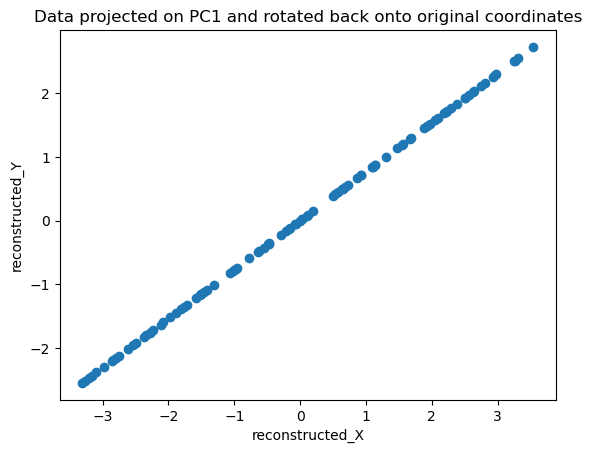

In [6]:
#Projecting the data onto PC1
PC1_projected_data_matrix = data_matrix_centered.dot(sorted_eigenvectors[0])
print('Data projected on PC1: \n', PC1_projected_data_matrix, 'Shape: \n', PC1_projected_data_matrix.shape)

#Rotating the projected data back onto PC1
PC1_projected_reshaped = PC1_projected_data_matrix.values.reshape(-1, 1)
reconstructed_data = PC1_projected_reshaped * sorted_eigenvectors[0]

print(reconstructed_data.shape) 

plt.scatter(reconstructed_data[:, 0], -reconstructed_data[:, 1])
plt.xlabel('reconstructed_X')
plt.ylabel('reconstructed_Y')
plt.title('Data projected on PC1 and rotated back onto original coordinates')
plt.show()

**Comment on reconstructed data plot:**
The range of the reconstructed data (close to -3, 3 on both axes) is much shorter than that of the original data (close to -10, 10 on both axes); this is because the PCA subspace captures less variance than the full dataset. Additionally, a negative sign introduced in producing the scatterplot to ensure that the line would appear to be in the same direction as the original data; the eigenvectors of the PCA approach specify direction, but not sign, of the relationship. Overall, the reconstructed scatterplot exhibits a much more linear trend, because the noise term was effectively eliminated by projecting the centered matrix onto the first principal component, which is that associated with the signal. 

**Question 2:** For this question use the Wages data set. 

1. Create a data frame with age and wage columns. Plot the data
2. Partition the age into two groups of $\leq 40$ and $\geq 40$ (create two separate data fames).
3. Fit each partition independently with linear regression. Plot the results and comment on it.
4. Repeat the same but using polynomial regression of degree 3.
5. Fit the data with regression splines using 3 knot points `knots = 25, 40, 60`. Plot the results.
6. Repeat the same using smoothing splines. Comment on your results


original_data: 
       year  age            maritl      race        education  \
0     2006   18  1. Never Married  1. White     1. < HS Grad   
1     2004   24  1. Never Married  1. White  4. College Grad   
2     2003   45        2. Married  1. White  3. Some College   
3     2003   43        2. Married  3. Asian  4. College Grad   
4     2005   50       4. Divorced  1. White       2. HS Grad   
...    ...  ...               ...       ...              ...   
2995  2008   44        2. Married  1. White  3. Some College   
2996  2007   30        2. Married  1. White       2. HS Grad   
2997  2005   27        2. Married  2. Black     1. < HS Grad   
2998  2005   27  1. Never Married  1. White  3. Some College   
2999  2009   55      5. Separated  1. White       2. HS Grad   

                  region        jobclass          health health_ins   logwage  \
0     2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1     2. Middle Atlantic  2. Information  2. >=Very 

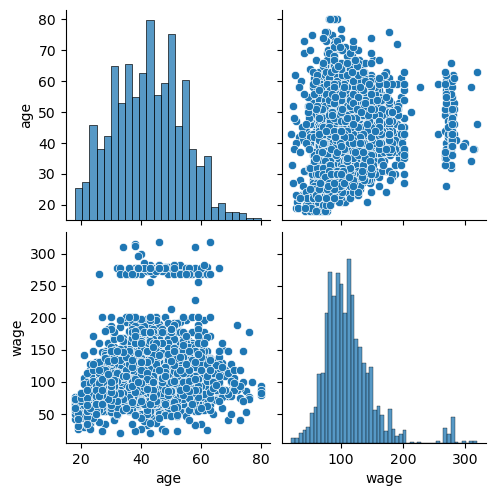

In [7]:
import numpy as np
import pandas as pd
from ISLP import load_data
from matplotlib import pyplot as plt
import copy #allows creating copies of objects
import seaborn as sns

#2.1 Create a data frame with age and wage columns. Plot the data.
original_data = load_data('Wage')

print('original_data: \n', original_data)

age_wage_data = original_data[['age', 'wage']]
print('age and wage data: \n', age_wage_data)

sns.pairplot(age_wage_data)

plt.show()


In [8]:
#2.2 Partition the age into two groups of $\leq 40$ and $\geq 40$ (two separate data frames)
#Creating the partition of under 40
age_wage_under40 = age_wage_data.copy()
age_wage_under40['age'] = age_wage_data['age'].mask(age_wage_data['age'] > 40, np.nan)
age_wage_under40 = age_wage_under40.dropna()
print('Under 40: \n', age_wage_under40)

#Creating the partition of over 40
age_wage_over40 = age_wage_data.copy()
age_wage_over40['age'] = age_wage_data['age'].mask(age_wage_data['age'] < 40, np.nan)
age_wage_over40 = age_wage_over40.dropna()
print('Over 40: \n', age_wage_over40)

Under 40: 
        age        wage
0     18.0   75.043154
1     24.0   70.476020
7     30.0  111.720849
11    34.0   81.283253
12    35.0   89.492480
...    ...         ...
2993  31.0  102.870247
2994  31.0  133.380608
2996  30.0   99.689464
2997  27.0   66.229408
2998  27.0   87.981033

[1329 rows x 2 columns]
Over 40: 
        age        wage
2     45.0  130.982177
3     43.0  154.685293
4     50.0   75.043154
5     54.0  127.115744
6     44.0  169.528538
...    ...         ...
2986  58.0  130.982177
2988  51.0  126.085057
2990  50.0  132.487821
2995  44.0  154.685293
2999  55.0   90.481913

[1784 rows x 2 columns]


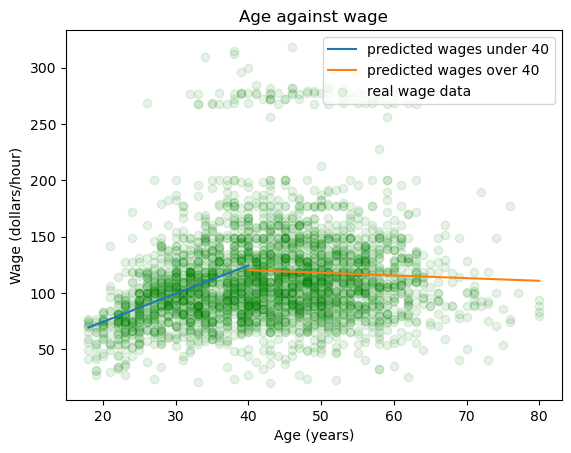

In [9]:
#2.3 Fit each partition independently with linear regression. Plot the results and comment on it.
from sklearn.linear_model import LinearRegression

#training the model for ages 40 and under
age_under40 = age_wage_under40['age'].values.reshape(-1, 1)
under40regression = LinearRegression().fit(age_under40, age_wage_under40['wage'])

#training the model for ages 40 and over
age_over40 = age_wage_over40['age'].values.reshape(-1, 1)
over40regression = LinearRegression().fit(age_over40, age_wage_over40['wage'])

#regression predictions for ages 18-40
plot_ages_under40 = np.arange(18, 41).reshape(-1, 1)
predict_wages_under40 = under40regression.predict(plot_ages_under40)

#regression predictions for ages 40-80
plot_ages_over40 = np.arange(40, 81).reshape(-1, 1)
predict_wages_over40 = over40regression.predict(plot_ages_over40)

#plotting both models with the original data
plt.plot(plot_ages_under40, predict_wages_under40)
plt.plot(plot_ages_over40, predict_wages_over40)
plt.scatter(age_wage_data['age'], age_wage_data['wage'], color='green', alpha=0.1)
plt.title('Age against wage')
plt.xlabel('Age (years)')
plt.ylabel('Wage (dollars/hour)')
plt.legend(['predicted wages under 40', 'predicted wages over 40', 'real wage data'])
plt.show()

**Comment:**
This partitioned linear regression analysis, which considers people younger than 41 and people older than 39 separately, suggests that wages can be predicted to quickly grow with age below 40, and that it tends to steadily decrease (stagnate) with age above 40. This analysis would also lead one to predict the highest wage for age 40.

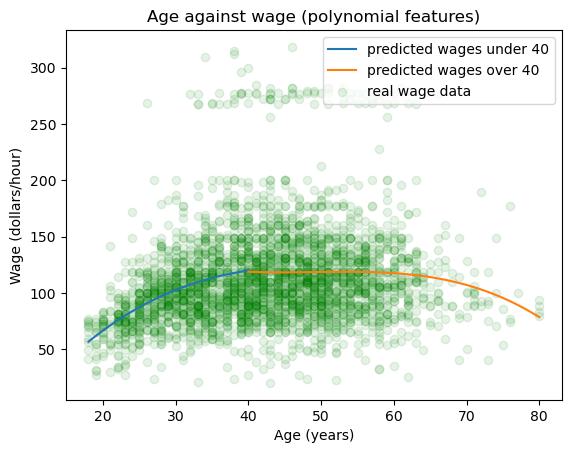

In [10]:
#2.4 Repeat the same but using polynomial regression of degree 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Pipeline transforms data using PolynomialFeatures and then creates the linear regression object
polynomial_model_under40 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
polynomial_model_over40 = copy.deepcopy(polynomial_model_under40) #deepcopy makes each model completely distinct

#Fitting the model(s)
polynomial_model_under40.fit(age_under40, age_wage_under40['wage'])
polynomial_model_over40.fit(age_over40, age_wage_over40['wage'])

#polynomial regression predictions for ages 16-40
predict_wages_under40_poly = polynomial_model_under40.predict(plot_ages_under40)

#regression predictions for ages 40-89
predict_wages_over40_poly = polynomial_model_over40.predict(plot_ages_over40)

#plotting both models with the original data
plt.plot(plot_ages_under40, predict_wages_under40_poly)
plt.plot(plot_ages_over40, predict_wages_over40_poly)
plt.scatter(age_wage_data['age'], age_wage_data['wage'], color='green', alpha=0.1)
plt.title('Age against wage (polynomial features)')
plt.xlabel('Age (years)')
plt.ylabel('Wage (dollars/hour)')
plt.legend(['predicted wages under 40', 'predicted wages over 40', 'real wage data'])
plt.show()


**Comment:** This partitioned linear regression analysis with polynomial features shows a relatively similar phenomenon to the ordinary linear regression analysis, which shows that wages tend to grow before age 40 and decline after age 40 with an expected peak at age 40,  but with slightly different properties. It seems that the rate at which wages grow before age 40 decelerates with age, that wages become approximately constant for several years after age 40, and that the decline of wages accelerates with age for the elderly approaching retirement.


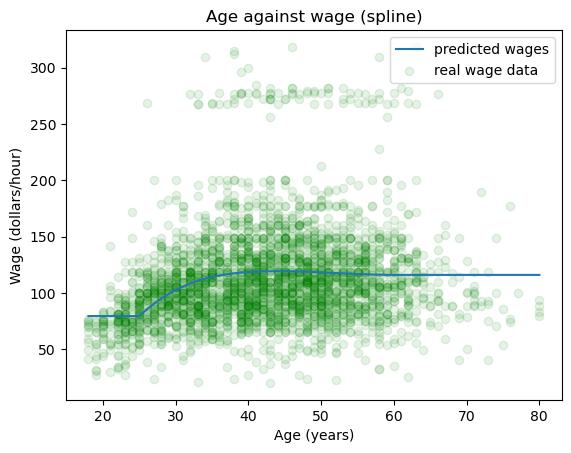

In [11]:
#2.5 Fit the data with regression splines using 3 knot points (25, 40, 60). Plot the results.
from sklearn.preprocessing import SplineTransformer

#defining the 3 knot points
knots = np.array([25, 40, 60]).reshape(-1, 1)

#preparing the predictor data and fitting the model for splines with these knot points
spline = SplineTransformer(knots=knots)
ages_spline = spline.fit_transform(age_wage_data['age'].values.reshape(-1, 1))
splines_model = LinearRegression()
splines_model.fit(ages_spline, age_wage_data['wage'].values.reshape(-1, 1))

#outputting the spline regression predictions of the model for the entire age dataset
plot_ages_all = np.append(plot_ages_under40, plot_ages_over40).reshape(-1, 1)
spline_plot_ages_all = spline.fit_transform(plot_ages_all)

predict_wages_spline = splines_model.predict(spline_plot_ages_all)

#plotting
plt.plot(plot_ages_all, predict_wages_spline)
plt.scatter(age_wage_data['age'], age_wage_data['wage'], color='green', alpha=0.1)
plt.title('Age against wage (spline)')
plt.xlabel('Age (years)')
plt.ylabel('Wage (dollars/hour)')
plt.legend(['predicted wages', 'real wage data'])
plt.show()


**Comment:** This graph shows that, below age 25, wages are rather stagnant, then, between ages 25 and 40, it grows according to a roughly logarithmic pattern, and, after age 40, wages become very stagnant.


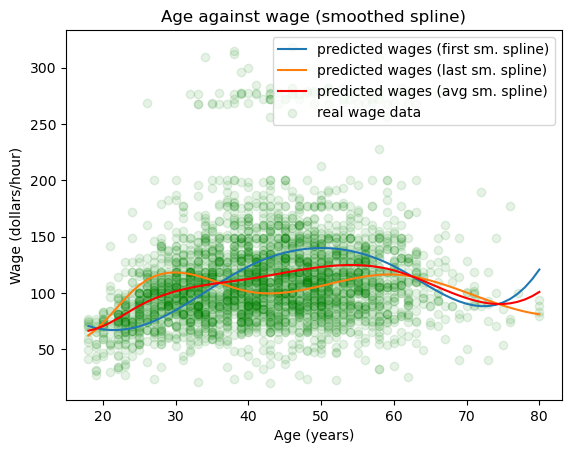

In [12]:
#2.6 repeat the same using smoothing splines. Comment on the results.
#using scipy's Bspline representation because scikit-learn does not seem to support smoothed splines.
from scipy.interpolate import splrep, BSpline
#preparing data for scipy.interpolate by removing duplicates and sorting by age
age_wage_last_duplicates = age_wage_data.drop_duplicates(subset='age', keep='last').sort_values(by='age')
age_wage_first_duplicates = age_wage_data.drop_duplicates(subset='age', keep='first').sort_values(by='age')

#interpolating smooth spline representation
#finding the average of two splines because scipy can only work without duplicates, creating two separately limited dataframes (one where the first duplicate is kept, and the other where the last duplicate is kept; these we average)
first_spline = splrep(age_wage_first_duplicates['age'].values, age_wage_first_duplicates['wage'].values, k = 3, t = knots.ravel())
first_smooth_spline_wages = BSpline(*first_spline)(plot_ages_all)
last_spline = splrep(age_wage_last_duplicates['age'].values, age_wage_last_duplicates['wage'].values, k = 3, t = knots.ravel())
last_smooth_spline_wages = BSpline(*last_spline)(plot_ages_all)
avg_smooth_spline_wages = (first_smooth_spline_wages + last_smooth_spline_wages) / 2 

#plotting
plt.plot(plot_ages_all, first_smooth_spline_wages)
plt.plot(plot_ages_all, last_smooth_spline_wages)
plt.plot(plot_ages_all, avg_smooth_spline_wages, color='red')
plt.scatter(age_wage_data['age'], age_wage_data['wage'], color='green', alpha=0.1)
plt.title('Age against wage (smoothed spline)')
plt.xlabel('Age (years)')
plt.ylabel('Wage (dollars/hour)')
plt.legend(['predicted wages (first sm. spline)','predicted wages (last sm. spline)','predicted wages (avg sm. spline)', 'real wage data'])
plt.show()

**Comment:**
Compared to the previous fitting by regression splines, the smoothed splines creates a more continuous, obviously differentiable curve. One of the notable differences between the regression splines and the smoothed splines in the visualization is that the smoothed splines analysis predicts that the wage will slightly increase again beyond age 70, presumably due to the existence of outlying senior executive roles. 